<a href="https://colab.research.google.com/github/superpanditas/TrueHome/blob/main/sirenas_endemicas_y_sirenas_migrantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### __*Importing the Libraries*__

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### First Problem

In [ ]:
venom = pd.read_csv('veneno.csv')

In [ ]:
venom.head()

,caracteristica,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,valor,21,56,2131.4,164.6,4527.9,1,2.09,3.8,538,23.7


In [ ]:
sust = pd.read_csv('sustancias_diversas.csv')

In [ ]:
sust.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,517,24.7,48.5,2449.5,133.0,5044.5,1.2,2.2,3.8,568.8,19.9
1,226,21.0,56.2,2114.7,163.7,4559.6,1.0,2.1,3.8,542.8,23.7
2,615,18.2,56.8,2055.4,150.3,4718.8,0.8,2.4,4.6,431.6,23.5
3,390,20.8,56.0,2112.9,165.9,4503.9,1.0,2.1,3.8,533.9,23.9
4,172,21.0,56.4,2146.7,166.0,4492.2,1.0,2.1,3.8,543.2,23.7


In [ ]:
sust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      500 non-null    int64  
 1   v1      500 non-null    float64
 2   v2      500 non-null    float64
 3   v3      500 non-null    float64
 4   v4      500 non-null    float64
 5   v5      500 non-null    float64
 6   v6      500 non-null    float64
 7   v7      500 non-null    float64
 8   v8      500 non-null    float64
 9   v9      500 non-null    float64
 10  v10     500 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 43.1 KB


In [ ]:
# 50 members 

In [ ]:
sust.columns

Index(['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10'], dtype='object')

In [ ]:
sust.describe().round(3)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,487.338,20.978,55.915,2122.974,165.231,4536.858,1.002,2.108,3.800,538.805,23.677
std,289.235,1.667,4.483,165.022,13.070,354.198,0.087,0.171,0.315,41.981,1.977
min,1.000,16.800,45.000,1705.700,132.100,3624.600,0.800,1.700,3.000,430.700,19.000
25%,233.750,20.800,55.400,2111.050,163.100,4485.775,1.000,2.100,3.800,532.875,23.500
50%,469.500,21.000,55.900,2129.800,164.750,4532.750,1.000,2.100,3.800,537.100,23.700
75%,745.250,21.200,56.500,2147.625,166.125,4572.550,1.000,2.100,3.800,542.800,23.900
max,995.000,25.200,67.200,2556.800,197.500,5430.000,1.200,2.500,4.600,644.300,28.400


<AxesSubplot:xlabel='v9', ylabel='Count'>

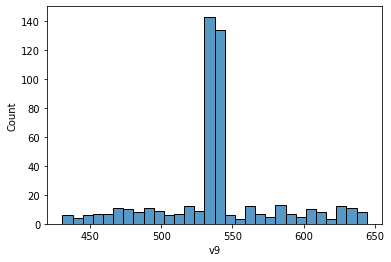

In [ ]:
sns.histplot(x='v9', data=sust, bins = 30)

In [ ]:
X = sust.drop(['id'], axis = 1)

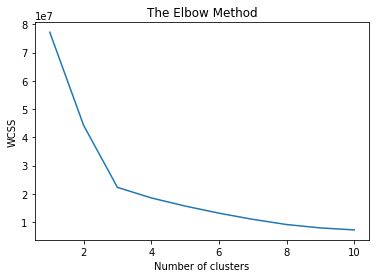

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
X['value'] = y_kmeans

In [ ]:
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,value
0,24.7,48.5,2449.5,133.0,5044.5,1.2,2.2,3.8,568.8,19.9,1
1,21.0,56.2,2114.7,163.7,4559.6,1.0,2.1,3.8,542.8,23.7,0
2,18.2,56.8,2055.4,150.3,4718.8,0.8,2.4,4.6,431.6,23.5,6
3,20.8,56.0,2112.9,165.9,4503.9,1.0,2.1,3.8,533.9,23.9,0
4,21.0,56.4,2146.7,166.0,4492.2,1.0,2.1,3.8,543.2,23.7,0


In [ ]:
X.groupby('value').agg({
    'v1': np.mean
   ,'v2': np.mean
   ,'v3': np.mean
   ,'v4': np.mean
   ,'v5': np.mean
   ,'v6': np.mean
   ,'v7': np.mean 
   ,'v8': np.mean
   ,'v9': np.mean
   ,'v10': np.mean
})

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
value,,,,,,,,,,
0,20.985430,55.867550,2139.082781,164.887086,4513.128808,0.997351,2.103974,3.796689,537.328808,23.800000
1,20.621212,54.766667,2343.163636,166.630303,5230.942424,1.009091,2.151515,3.748485,550.636364,22.206061
2,20.446429,56.167857,2356.350000,157.435714,3981.400000,1.025000,2.089286,3.957143,549.989286,22.900000
3,21.189362,57.431915,1958.948936,168.980851,3907.534043,1.021277,2.117021,3.840426,533.548936,24.585106
4,21.130000,55.985000,1824.330000,164.505000,5246.285000,1.010000,2.045000,3.775000,539.985000,23.510000
5,21.203226,54.270968,1839.925806,167.174194,4667.754839,0.967742,2.106452,3.800000,543.529032,23.080645
6,21.089744,56.520513,2220.174359,166.617949,4822.658974,1.010256,2.133333,3.715385,534.171795,23.992308


In [ ]:
venom.head()

,caracteristica,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,valor,21,56,2131.4,164.6,4527.9,1,2.09,3.8,538,23.7


### __*Second Problem*__

In [ ]:
jamones = pd.read_csv('score_de_jamonosidad.csv')

In [ ]:
jamones.head()

,jamon,score,v1,v2,v3
0,1,10,1985,59.7,2205
1,2,11,2855,55.0,2096
2,3,11,1737,65.6,1847
3,4,13,2905,61.4,1903
4,5,10,1666,66.1,1457


<AxesSubplot:xlabel='score', ylabel='count'>

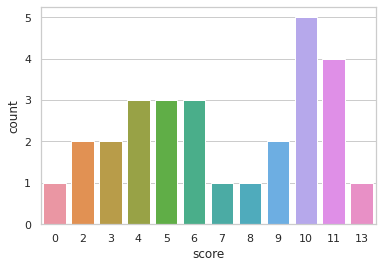

In [ ]:
sns.countplot(x='score', data=jamones)

In [ ]:
jamones.groupby('score').agg({
                               'v1': np.mean
                              ,'v2': np.mean  
                              ,'v3': np.mean
                              }).round(2)

,v1,v2,v3
score,,,
0,1503.00,53.50,2560.00
2,2243.50,51.35,2676.00
3,1699.00,57.30,2397.50
4,1629.67,55.50,2306.33
5,2243.67,52.77,2407.00
6,2274.67,57.60,2120.00
7,1480.00,68.50,1984.00
8,1638.00,65.30,1786.00
9,2216.50,58.70,1735.00


In [ ]:
jamones.describe()

,jamon,score,v1,v2,v3
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.500000,6.964286,2127.214286,58.296429,2132.964286
std,8.225975,3.479912,499.116134,5.457342,367.711288
min,1.000000,0.000000,1414.000000,43.800000,1457.000000
25%,7.750000,4.000000,1714.000000,54.775000,1887.750000
50%,14.500000,6.500000,2106.000000,58.850000,2062.500000
75%,21.250000,10.000000,2474.250000,61.100000,2427.250000
max,28.000000,13.000000,2929.000000,68.500000,2876.000000


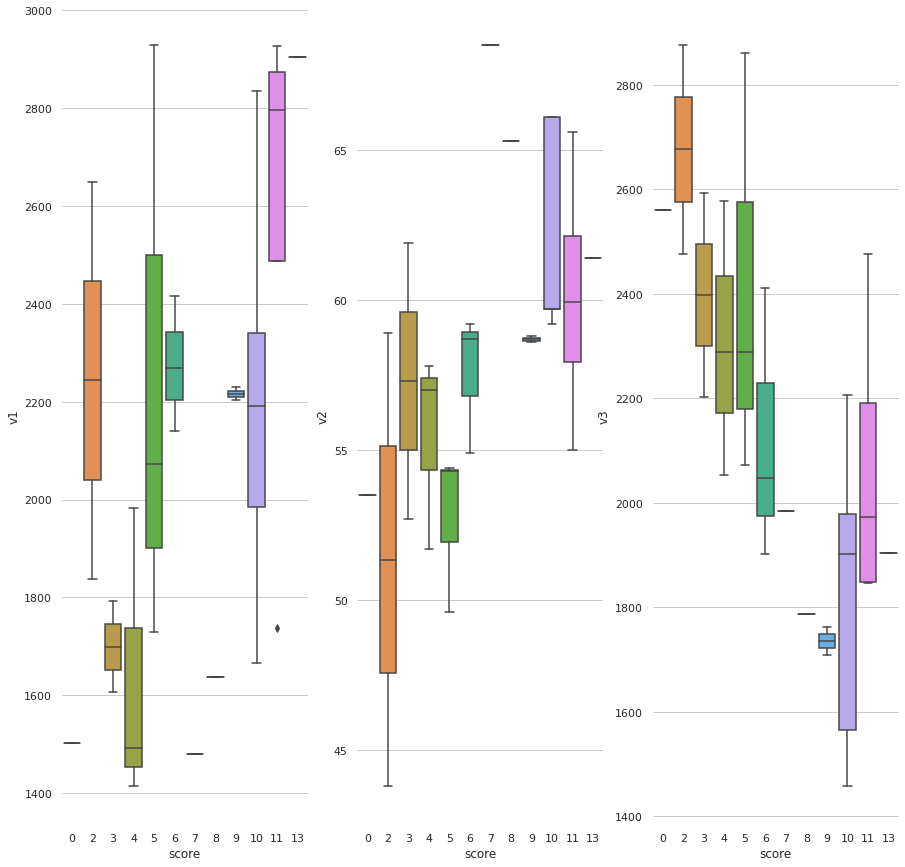

In [ ]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(15, 15))
#my_pal = {"sirena_migrante": "r", "sirena_endemica": "g"}
# plot (1,1)
plt.subplot(1,3,1)
sns.boxplot(x='score', y='v1', data=jamones)
sns.despine(left=True, bottom=True)

# plot(1,2)
plt.subplot(1,3,2)
sns.boxplot(x='score', y='v2', data=jamones)
sns.despine(left=True, bottom=True)

# plot(2,1)
plt.subplot(1,3,3)
sns.boxplot(x='score', y='v3', data=jamones)
sns.despine(left=True, bottom=True)

In [ ]:
jamones.corr()

,jamon,score,v1,v2,v3
jamon,1.000000,-0.683794,-0.171793,-0.473936,0.373550
score,-0.683794,1.000000,0.482735,0.557565,-0.658654
v1,-0.171793,0.482735,1.000000,-0.194074,0.029643
v2,-0.473936,0.557565,-0.194074,1.000000,-0.679860
v3,0.373550,-0.658654,0.029643,-0.679860,1.000000


## __*Desafio: El seductor canto de las sirenas*__

#### Importing Dataset

In [ ]:
sirenas = pd.read_csv('sirenas_endemicas_y_sirenas_migrantes_historico.csv')

__*Review our Dataset*__

<ul>
    <li> How many rows do we have? </li>
    <li> Do we have empty values? </li>
    <li> Do we have balance data or not? </li>
    <li> How many variables do we have? </li>
    <li> ... and so on </li>
</ul>

In [ ]:
sirenas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   v1       100 non-null    float64
 1   v2       100 non-null    float64
 2   v3       100 non-null    float64
 3   v4       100 non-null    float64
 4   especie  100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


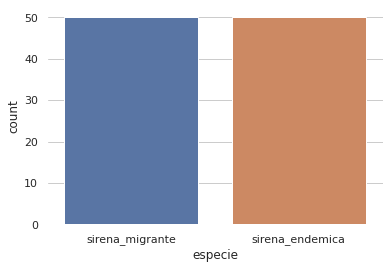

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x='especie', data = sirenas)
sns.despine(left=True, bottom=True)

In [ ]:
sirenas.describe().round(3)

,v1,v2,v3,v4
count,100.000,100.000,100.000,100.000
mean,5.797,3.196,3.508,1.135
std,0.945,0.416,2.094,0.919
min,4.300,2.200,1.000,0.100
25%,5.000,3.000,1.500,0.200
50%,5.700,3.150,3.200,1.000
75%,6.500,3.400,5.525,2.000
max,7.900,4.400,6.900,2.500


#### Analyze Data

In [ ]:
sirenas.columns

Index(['v1', 'v2', 'v3', 'v4', 'especie'], dtype='object')

In [ ]:
col = ['v1', 'v2', 'v3', 'v4']

#### Correlation

__*Exist a strong correlation between variables called*__ 
<li> v1 and (v3, v4) </li>
<li> v3 and (v1, v4) </li>
<li> v4 and (v1, v3) </li>

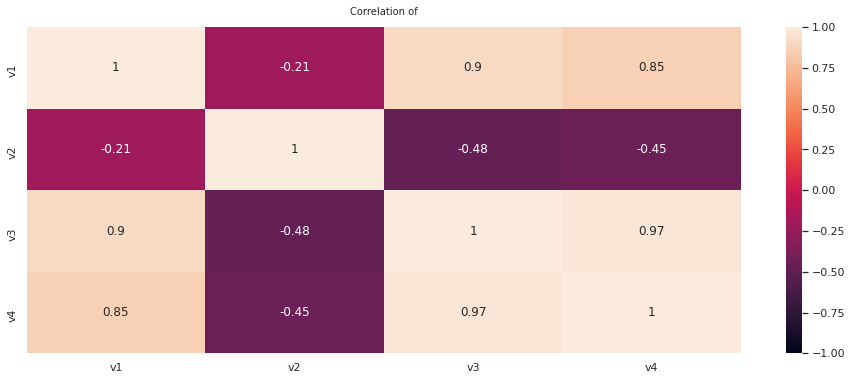

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(sirenas[col].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation of", fontdict={'fontsize':10}, pad=12);

__*The variables named v3 and v4 have a good distribution to differentiate between classes, and I also noticed some outliers in each variable.
Highlighting outliers in v1 and v2 because we can misclassify since the dispersion between them is very close.*__

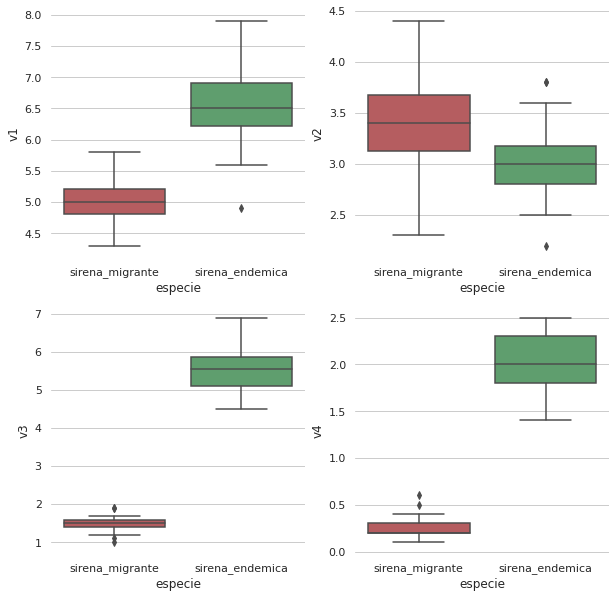

In [ ]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(10,10))
my_pal = {"sirena_migrante": "r", "sirena_endemica": "g"}
# plot (1,1)
plt.subplot(2,2,1)
sns.boxplot(x='especie', y='v1', data=sirenas, palette=my_pal)
sns.despine(left=True, bottom=True)

# plot(1,2)
plt.subplot(2,2,2)
sns.boxplot(x='especie', y='v2', data=sirenas, palette=my_pal)
sns.despine(left=True, bottom=True)

# plot(2,1)
plt.subplot(2,2,3)
sns.boxplot(x='especie', y='v3', data=sirenas, palette=my_pal)
sns.despine(left=True, bottom=True)

# plot(2,2)
plt.subplot(2,2,4)
sns.boxplot(x='especie', y='v4', data=sirenas, palette=my_pal)
sns.despine(left=True, bottom=True)

__*Visualize distribution of our variables according of the class*__

<AxesSubplot:xlabel='v4', ylabel='Count'>

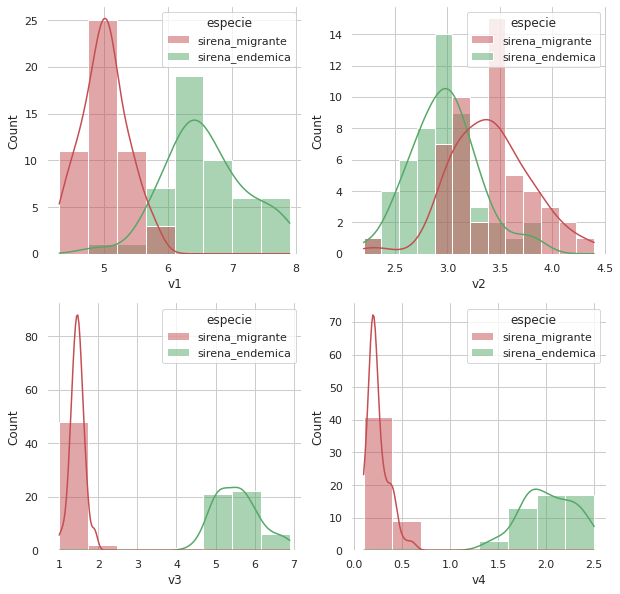

In [ ]:
sns.set(style='whitegrid')

f, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
sns.despine(left=True, bottom=True)

my_pal = {"sirena_migrante": "r", "sirena_endemica": "g"}

# plot (1,1)
sns.histplot(data=sirenas, x='v1', hue='especie', palette=my_pal, kde=True, ax=axs[0, 0])

# plot(1,2)
sns.histplot(data=sirenas, x='v2', hue='especie', palette=my_pal, kde=True, ax=axs[0, 1])

# plot(2,1)
sns.histplot(data=sirenas, x='v3', hue='especie', palette=my_pal, kde=True, ax=axs[1, 0])

# plot(2,2)
sns.histplot(data=sirenas, x='v4', hue='especie', palette=my_pal, kde=True, ax=axs[1, 1])

__*Visualize distribution of our variables, just var 2 is similar a normal distribution and the rest are bimodal.*__

<AxesSubplot:xlabel='v4', ylabel='Count'>

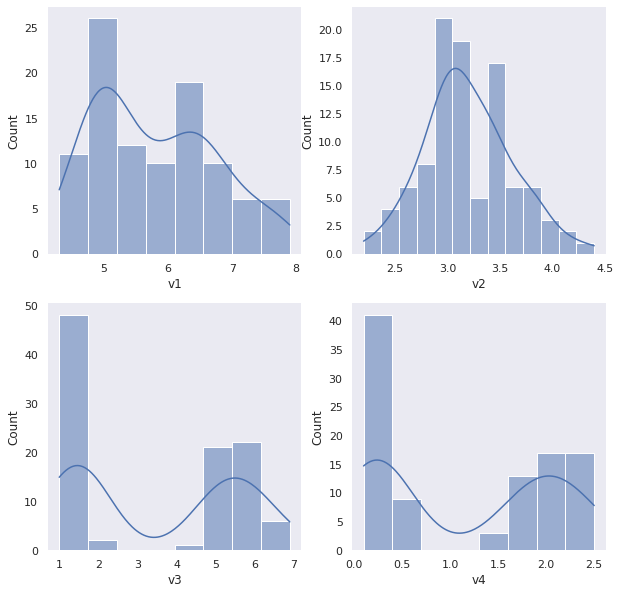

In [ ]:
sns.set(style='dark')

f, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
sns.despine(left=True, bottom=True)

# plot (1,1)
sns.histplot(data=sirenas, x='v1', kde=True, ax=axs[0, 0])

# plot(1,2)
sns.histplot(data=sirenas, x='v2', kde=True, ax=axs[0, 1])

# plot(2,1)
sns.histplot(data=sirenas, x='v3', kde=True, ax=axs[1, 0])

# plot(2,2)
sns.histplot(data=sirenas, x='v4', kde=True, ax=axs[1, 1])

### __*Applying PCA to visualize the data*__

__*Before applying PCA we need to scale features because PCA is affected by scale*__

In [ ]:
from sklearn.preprocessing import StandardScaler

x_pca = sirenas.loc[:, col].values

y_pca = sirenas.loc[:, ['especie']].values

x_pca = StandardScaler().fit_transform(x_pca)

__*Applying PCA with 2 variables and visualize the data*__

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pComponents = pca.fit_transform(x_pca)
pData = pd.DataFrame(data = pComponents, columns = ['pComponent 1', 'pComponent 2'])

In [ ]:
pcaData = pd.concat([pData, sirenas[['especie']]], axis = 1)

In [ ]:
# pca.explained_variance_ratio_

__*In effect, we can separate our data in a linear way*__

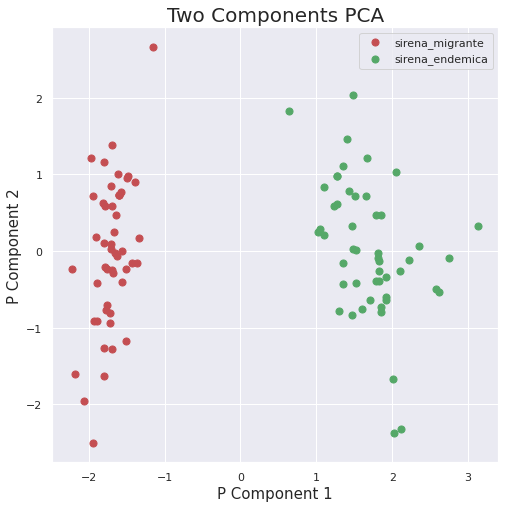

In [ ]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('P Component 1', fontsize = 15)
ax.set_ylabel('P Component 2', fontsize = 15)
ax.set_title('Two Components PCA', fontsize = 20)

labels = ['sirena_migrante', 'sirena_endemica']
colors = ['r', 'g']

for label, color in zip(labels,colors):
    idx = pcaData['especie'] == label
    ax.scatter(pcaData.loc[idx, 'pComponent 1']
               , pcaData.loc[idx, 'pComponent 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

### __*Using SVM to build a model*__

In [ ]:
def change_label(dta):
    if dta == 'sirena_migrante':
        return 0
    else:
        return 1
    
sirenas['especie_label'] = sirenas['especie'].apply(change_label)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X = sirenas.loc[:, col]
Y = sirenas.loc[:, ['especie_label']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=30)

In [ ]:
print("Train Feature Shape", x_train.shape)
print("Train Label Shape", y_train.shape)

Train Feature Shape (75, 4)
Train Label Shape (75, 1)


__*Using pipeline to build a model*__

In [ ]:
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [ ]:
svm_clf.fit(x_train, y_train)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
y_predict = svm_clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predict)
matrix

array([[12,  0],
       [ 0, 13]])

In [ ]:
def original_label(dta):
    if dta == 0:
        return 'sirena_migrante'
    else:
        return 'sirena_endemica'

y_predict = pd.DataFrame(y_predict)
y_predict['especie'] = y_predict.iloc[:,0].apply(original_label)
y_predict

,0,especie
0,1,sirena_endemica
1,0,sirena_migrante
2,1,sirena_endemica
3,1,sirena_endemica
4,1,sirena_endemica
5,1,sirena_endemica
6,1,sirena_endemica
7,0,sirena_migrante
8,1,sirena_endemica
9,1,sirena_endemica


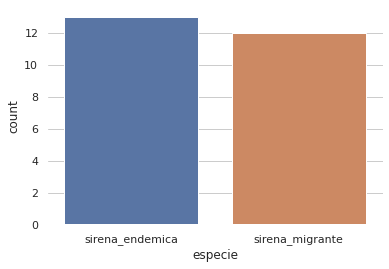

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x='especie', data = y_predict)
sns.despine(left=True, bottom=True)

### __*Predicting on New Data*__

In [ ]:
sir = pd.read_csv('sirenas_endemicas_y_sirenas_migrantes.csv')

In [ ]:
sir.columns

Index(['v1', 'v2', 'v3', 'v4', 'especie'], dtype='object')

In [ ]:
new_col = ['v1', 'v2', 'v3', 'v4']

In [ ]:
sir.head()

,v1,v2,v3,v4,especie
0,6.6,2.3,4.1,1.5,NaN
1,4.5,2.9,2.4,1.6,NaN
2,5.7,2.3,6.3,0.4,NaN
3,5.1,3.3,1.7,2.1,NaN
4,7.0,4.0,1.0,1.6,NaN


In [ ]:
sir_predict = svm_clf.predict(sir.loc[:,new_col])

<AxesSubplot:xlabel='especies', ylabel='count'>

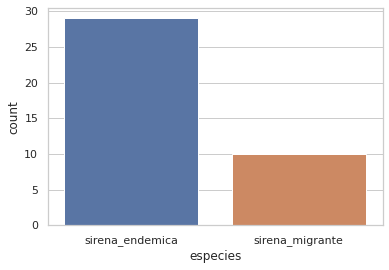

In [ ]:
sir_predict = pd.DataFrame(sir_predict, columns=['especie'])
sir_predict['especies'] = sir_predict.iloc[:,0].apply(original_label)
sns.countplot(x='especies', data=sir_predict)

In [ ]:
sir['especies'] = sir_predict['especies']

In [ ]:
sir.columns

Index(['v1', 'v2', 'v3', 'v4', 'especie', 'especies'], dtype='object')

In [ ]:
sir.groupby('especies').agg({
                               'v1': np.mean
                              ,'v2': np.mean  
                              ,'v3': np.mean
                              ,'v4': np.mean
                              }).round(2)

,v1,v2,v3,v4
especies,,,,
sirena_endemica,6.42,3.36,4.27,1.37
sirena_migrante,5.15,3.56,2.66,1.25


In [ ]:
values = ['v1', 'v2', 'v3', 'v4', 'especies']
# sir.loc[:, values].to_csv('sirenas_endemicas_y_sirenas_migrantes.csv')
sir.loc[:, values].head(10)

,v1,v2,v3,v4,especies
0,6.6,2.3,4.1,1.5,sirena_endemica
1,4.5,2.9,2.4,1.6,sirena_migrante
2,5.7,2.3,6.3,0.4,sirena_endemica
3,5.1,3.3,1.7,2.1,sirena_migrante
4,7.0,4.0,1.0,1.6,sirena_migrante
5,7.6,2.3,2.1,1.2,sirena_endemica
6,4.7,3.3,5.6,1.8,sirena_endemica
7,4.9,3.8,2.0,2.4,sirena_migrante
8,7.4,3.0,4.3,0.8,sirena_endemica
9,6.0,3.0,2.5,2.1,sirena_endemica
